<a href="https://colab.research.google.com/github/JooVLC/Coursera-TensorFlow-in-practice-specialization/blob/main/Exercise_3_Convolutions_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [3]:
class tf_stop_training_after_hit_accuracy_callback(keras.callbacks.Callback):
  def __init__(self, desired_accuracy):
    self.desired_accuracy = desired_accuracy
    super().__init__()

  def on_epoch_end(self, epoch, logs={}):
    current_epoch_accuracy = logs.get('accuracy')
    if current_epoch_accuracy is not None and current_epoch_accuracy >= self.desired_accuracy:
      self.model.stop_training = True

In [4]:
selected_dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = selected_dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

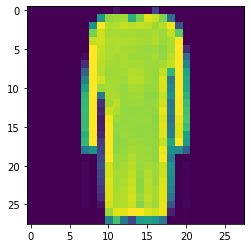

In [6]:
plt.imshow(train_images_normalized[25])

In [7]:
relu = tf.nn.relu
softmax = tf.nn.softmax

model = keras.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation=relu, input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation=relu))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation=relu))
model.add(keras.layers.Dense(units=10, activation=softmax))

model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [8]:
callback_to_stop_training = tf_stop_training_after_hit_accuracy_callback(0.998)

In [9]:
model.fit(train_images_normalized, train_labels, epochs=10000, callbacks=[callback_to_stop_training])

Epoch 1/10000
1875/1875 [==============================] - 18s 3ms/step - loss: 0.4145 - accuracy: 0.8479
Epoch 2/10000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2744 - accuracy: 0.8986
Epoch 3/10000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2297 - accuracy: 0.9136
Epoch 4/10000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1943 - accuracy: 0.9265
Epoch 5/10000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1658 - accuracy: 0.9381
Epoch 6/10000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1385 - accuracy: 0.9467
Epoch 7/10000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1162 - accuracy: 0.9564
Epoch 8/10000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0997 - accuracy: 0.9619
Epoch 9/10000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0832 - accuracy: 0.9692
Epoch 10/10000
1875/1875 [============================

In [11]:
model.evaluate(test_images_normalized, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.9852 - accuracy: 0.9071


[1.9852187633514404, 0.9071000218391418]